<a href="https://colab.research.google.com/github/pepetonof/UX-DL/blob/main/UX_DL_claseMuestra_MLPClasificacionRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

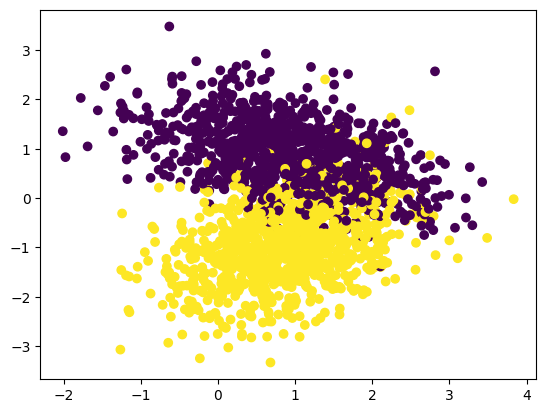

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(
    n_samples = 2000,
    n_features = 2,
    n_informative = 2,
    n_redundant = 0,
    n_classes = 2,
    flip_y = 0,
    n_clusters_per_class = 1,
    class_sep = 0.9
)


plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

sX = MinMaxScaler().fit_transform(X)
Xtr, Xte, ytr, yte = train_test_split(sX, y, test_size=0.1)

In [3]:
##Clasificacion
from sklearn.neural_network import MLPClassifier
import warnings

def warn(*args, **kwargs):
    pass
warnings.warn = warn

ite = np.arange(200,1601, step = 200)

for i, it in enumerate(ite):
    print(f'Máximo número de iteraciones: {it}')
    mlp = MLPClassifier(max_iter=it, solver='sgd', activation='logistic', early_stopping=False)
    mlp.fit(Xtr, ytr)
    y_hat = mlp.predict(Xte)
    print(f'MLP Classifier sin parada tempana Accuracy entrenamiento {mlp.score(Xtr, ytr)}')
    print(f'MLP Classifier sin parada tempana Accuracy prueba {mlp.score(Xte, yte)}')
    print(f'Iteraciones requeridas {mlp.n_iter_}')


    mlp = MLPClassifier(max_iter=it, solver='sgd', activation='logistic', early_stopping=True, n_iter_no_change=1)
    mlp.fit(Xtr, ytr)
    y_hat = mlp.predict(Xte)
    print(f'MLP Classifier con parada tempana Accuracy entrenamiento {mlp.score(Xtr, ytr)}')
    print(f'MLP Classifier con parada tempana Accuracy prueba {mlp.score(Xte, yte)}')
    print(f'Iteraciones requeridas {mlp.n_iter_}')

    print('*****')

Máximo número de iteraciones: 200
MLP Classifier sin parada tempana Accuracy entrenamiento 0.5033333333333333
MLP Classifier sin parada tempana Accuracy prueba 0.47
Iteraciones requeridas 15
MLP Classifier con parada tempana Accuracy entrenamiento 0.8261111111111111
MLP Classifier con parada tempana Accuracy prueba 0.885
Iteraciones requeridas 5
*****
Máximo número de iteraciones: 400
MLP Classifier sin parada tempana Accuracy entrenamiento 0.5038888888888889
MLP Classifier sin parada tempana Accuracy prueba 0.47
Iteraciones requeridas 21
MLP Classifier con parada tempana Accuracy entrenamiento 0.5033333333333333
MLP Classifier con parada tempana Accuracy prueba 0.47
Iteraciones requeridas 3
*****
Máximo número de iteraciones: 600
MLP Classifier sin parada tempana Accuracy entrenamiento 0.5033333333333333
MLP Classifier sin parada tempana Accuracy prueba 0.47
Iteraciones requeridas 19
MLP Classifier con parada tempana Accuracy entrenamiento 0.73
MLP Classifier con parada tempana Accura

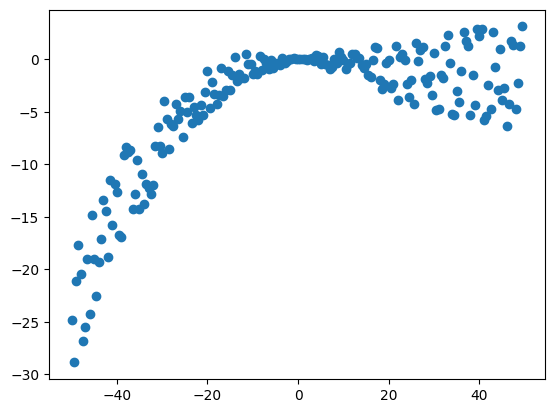

In [4]:
#Regresion
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = np.arange(-50, 50, 0.5)
y = 0.0001 * X ** 3 - 0.005 * X ** 2 + 0.001 * X - np.random.randint(-25,25,200) * 0.005 * X

plt.scatter(X, y)
plt.show()

X = X.reshape((-1,1))
sX = MinMaxScaler().fit_transform(X)

Xtr, Xte, ytr, yte = train_test_split(sX, y, test_size=0.1)


MLP Regresor R2 score entrenamiento 0.8732685308981488
MLP Regresor R2 score prueba 0.8768328876791865


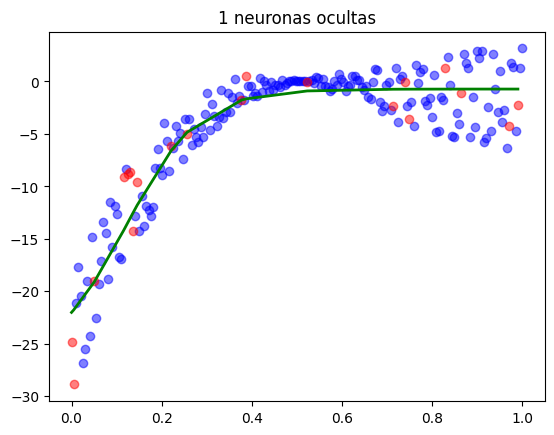

MLP Regresor R2 score entrenamiento 0.921842051260688
MLP Regresor R2 score prueba 0.5506260518463875


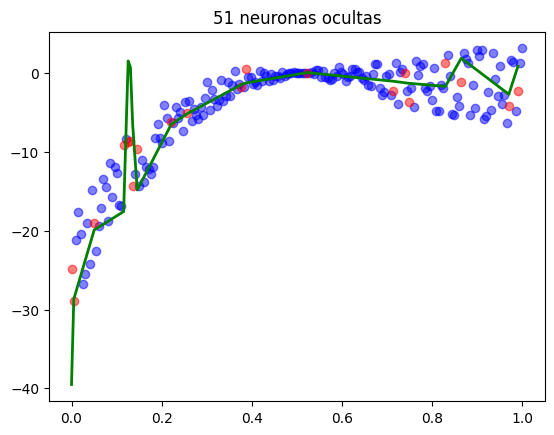

MLP Regresor R2 score entrenamiento 0.9269516279781586
MLP Regresor R2 score prueba 0.8822749836452981


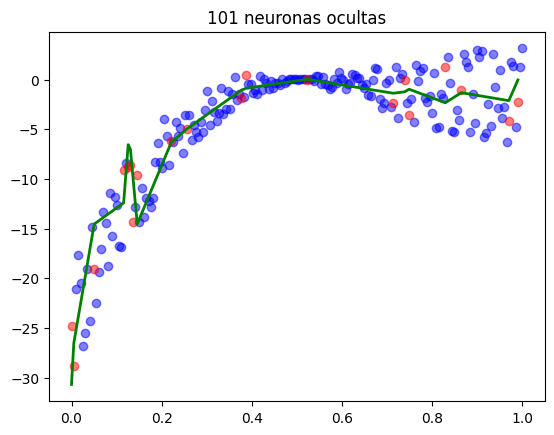

MLP Regresor R2 score entrenamiento 0.9425360380854996
MLP Regresor R2 score prueba 0.8368995897589637


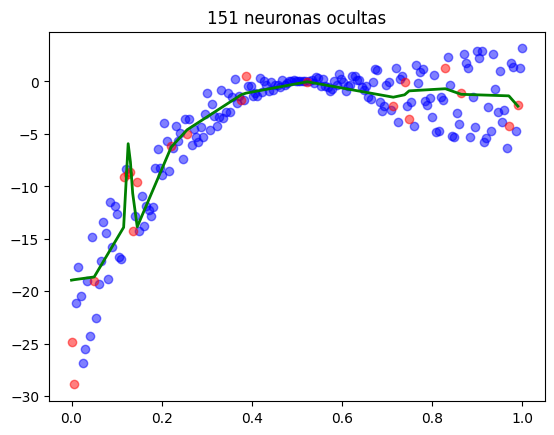

In [ ]:
from sklearn.neural_network import MLPRegressor
import warnings

def warn(*args, **kwargs):
    pass
warnings.warn = warn

h_neurons = np.arange(1,202, step = 50)

for i, hn in enumerate(h_neurons):
    mlp = MLPRegressor(hidden_layer_sizes=[hn], max_iter=25000, solver='lbfgs', activation='logistic', alpha=0)
    mlp.fit(Xtr, ytr)
    y_hat = mlp.predict(Xte)
    print(f'MLP Regresor R2 score entrenamiento {mlp.score(Xtr, ytr)}')
    print(f'MLP Regresor R2 score prueba {mlp.score(Xte, yte)}')

    mdl = np.column_stack((Xte, y_hat))
    mdl = mdl[mdl[:, 0].argsort()]
    plt.subplot(1,1,1)
    plt.scatter(Xtr[:, 0], ytr, label='Training Data', color='blue', alpha=0.5)
    plt.scatter(Xte[:, 0], yte, label='Training Data', color='red', alpha=0.5)
    plt.plot(mdl[:, 0], mdl[:, 1], label='Predictions', color='green', linewidth=2)
    plt.title(f'{hn} neuronas ocultas')

    plt.show()
